# HW04 Rocket

Assume:
* CG is constant

In [1]:
import casadi as ca
from casadi import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from casadi.tools.graph import dotgraph
from IPython.display import Image

def draw_graph(expr):
    return Image(dotgraph(expr).create_png())

In [3]:
# Rocket Specification
r_rocket = 0.1       # m
l_rocket = 2         # m
m0_rocket = 0.2      # kg
mfull_rocket = 1     # kg
burn_rate = 0.2      # kg/s
XCG = 0.5            # Non-dimensionalized location of CG

CL0 = 0
CLa = 2 * np.pi
kclcd = 0.01
CD0 = 0
sf = 0.1
sb = np.pi * r_rocket**2
lf = 1.0
CDb = 0.01

# Inertia as a function of mass
# Ixx = m
# Iyy = m
# Ixy = 0
# Iyz = 0

In [4]:
# Variables
# State
VT = ca.SX.sym('VT')
H = ca.SX.sym('H')
RHO = ca.SX.sym('RHO')

# For EOM
THR = ca.SX.sym('THR')
M = ca.SX.sym('M')
D_rocket = ca.SX.sym('D_rocket')
L = ca.SX.sym('L')
CL = ca.SX.sym('CL')
CD = ca.SX.sym('CD')
D = ca.SX.sym('D')
el = ca.SX.sym('el')

In [5]:
x = ca.vertcat(VT)
u = ca.vertcat(el)
p = ca.vertcat(THR, D_rocket, M)

In [6]:
def rocket_state(x, p):
    VT = x[0]
    THR = p[0]
    D_rocket = p[1]
    M = p[2]
    xd0 = (THR - D_rocket) / M
    xd = ca.vertcat(xd0)
    return xd

In [7]:
def trim_cost(xd, u):
    return xd[0]**2 + u[0]**2

In [8]:
def calc_cost(x, p, u):
    # Construct xd
    xd = rocket_state(x, p)

    # Calculate Trim Cost
    c = trim_cost(xd, u)
    return c

In [9]:
def objective(x, p, u):
    xd = rocket_state(x, p)
    f = calc_cost(x, p, u)
    return f

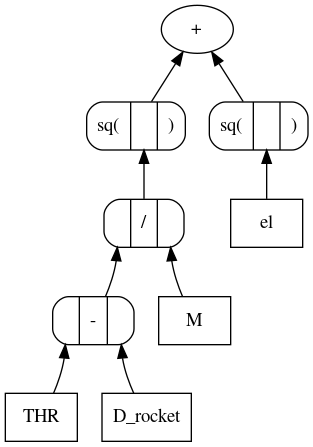

In [10]:
draw_graph(objective(x, p, u))

In [11]:
def AeroForceMoment(VT, el, H):
    # Calculating Density
    R0 = 2.377E-3
    TFAC = 1.0 - (0.703E-5) * H
    T1 = 519.0 * TFAC
    T2 = 390.0
    Temp = ca.if_else(H >= 35000, T2, T1)
    Rho = R0 * (TFAC**4.14)
    
    q = 0.5 * RHO * VT**2
    CL = CL0 + CLa * el
    CD = CD0 * kclcd * CL**2
    
    Lf = CL * q * sf
    Df = CD * q * sf
    
    Db = CDb * q * sb
    
    m_aero = Lf * Lf
    return ca.vertcat(Lf, Df)

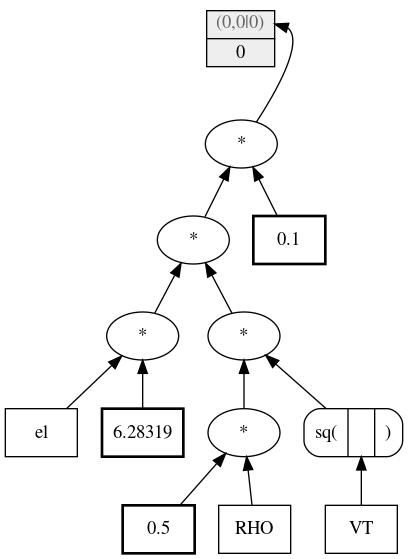

In [12]:
draw_graph(AeroForceMoment(VT, el, H))